# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
import umap
from sklearn.linear_model import Ridge
from sklearn.decomposition import FastICA
from sklearn.linear_model import ElasticNet
from sklearn.ensemble._gb import GradientBoostingRegressor 

# Importing Dataset and test train split 

In [3]:
#Loading the dataset
data = pd.read_csv('ElectricityBILL.csv')
data['Green_Certified'] = data['Green_Certified'].replace(1, 'Yes')
data['Green_Certified'] = data['Green_Certified'].replace(0, 'No')
# Quick inspection of the dataset
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Split the dataset into 80% train and 20% test
train_data, test_data = tts(data, test_size=0.2, random_state=42)

   Building_Type  Construction_Year  Number_of_Floors  \
0    Residential               1989                12   
1  Institutional               1980                 6   
2     Industrial               2006                10   
3     Commercial               1985                 1   
4     Industrial               2006                12   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   50.000000                477.681762   
1                  225.759107                200.000000   
2                   98.755927                200.000000   
3                   68.470692                200.000000   
4                   50.000000                347.093644   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                  48.417266       81.814110           13.780635   
1                  46.405516       45.109000           10.177771   
2                  17.247585       48.526225           27.757026   
3                  57.719480  

# Splitting voth train and test data into y and x 

In [4]:

X = train_data.drop(columns=['Electricity_Bill'])  # Features for train 
y = train_data['Electricity_Bill']  # Target variable for train 
X_test = test_data.drop(columns=['Electricity_Bill'])  # Features  for test data 
y_test = test_data['Electricity_Bill']  # Target variable for test data

## Pair Plot for numerical features for part A 

<Figure size 20000x20000 with 0 Axes>

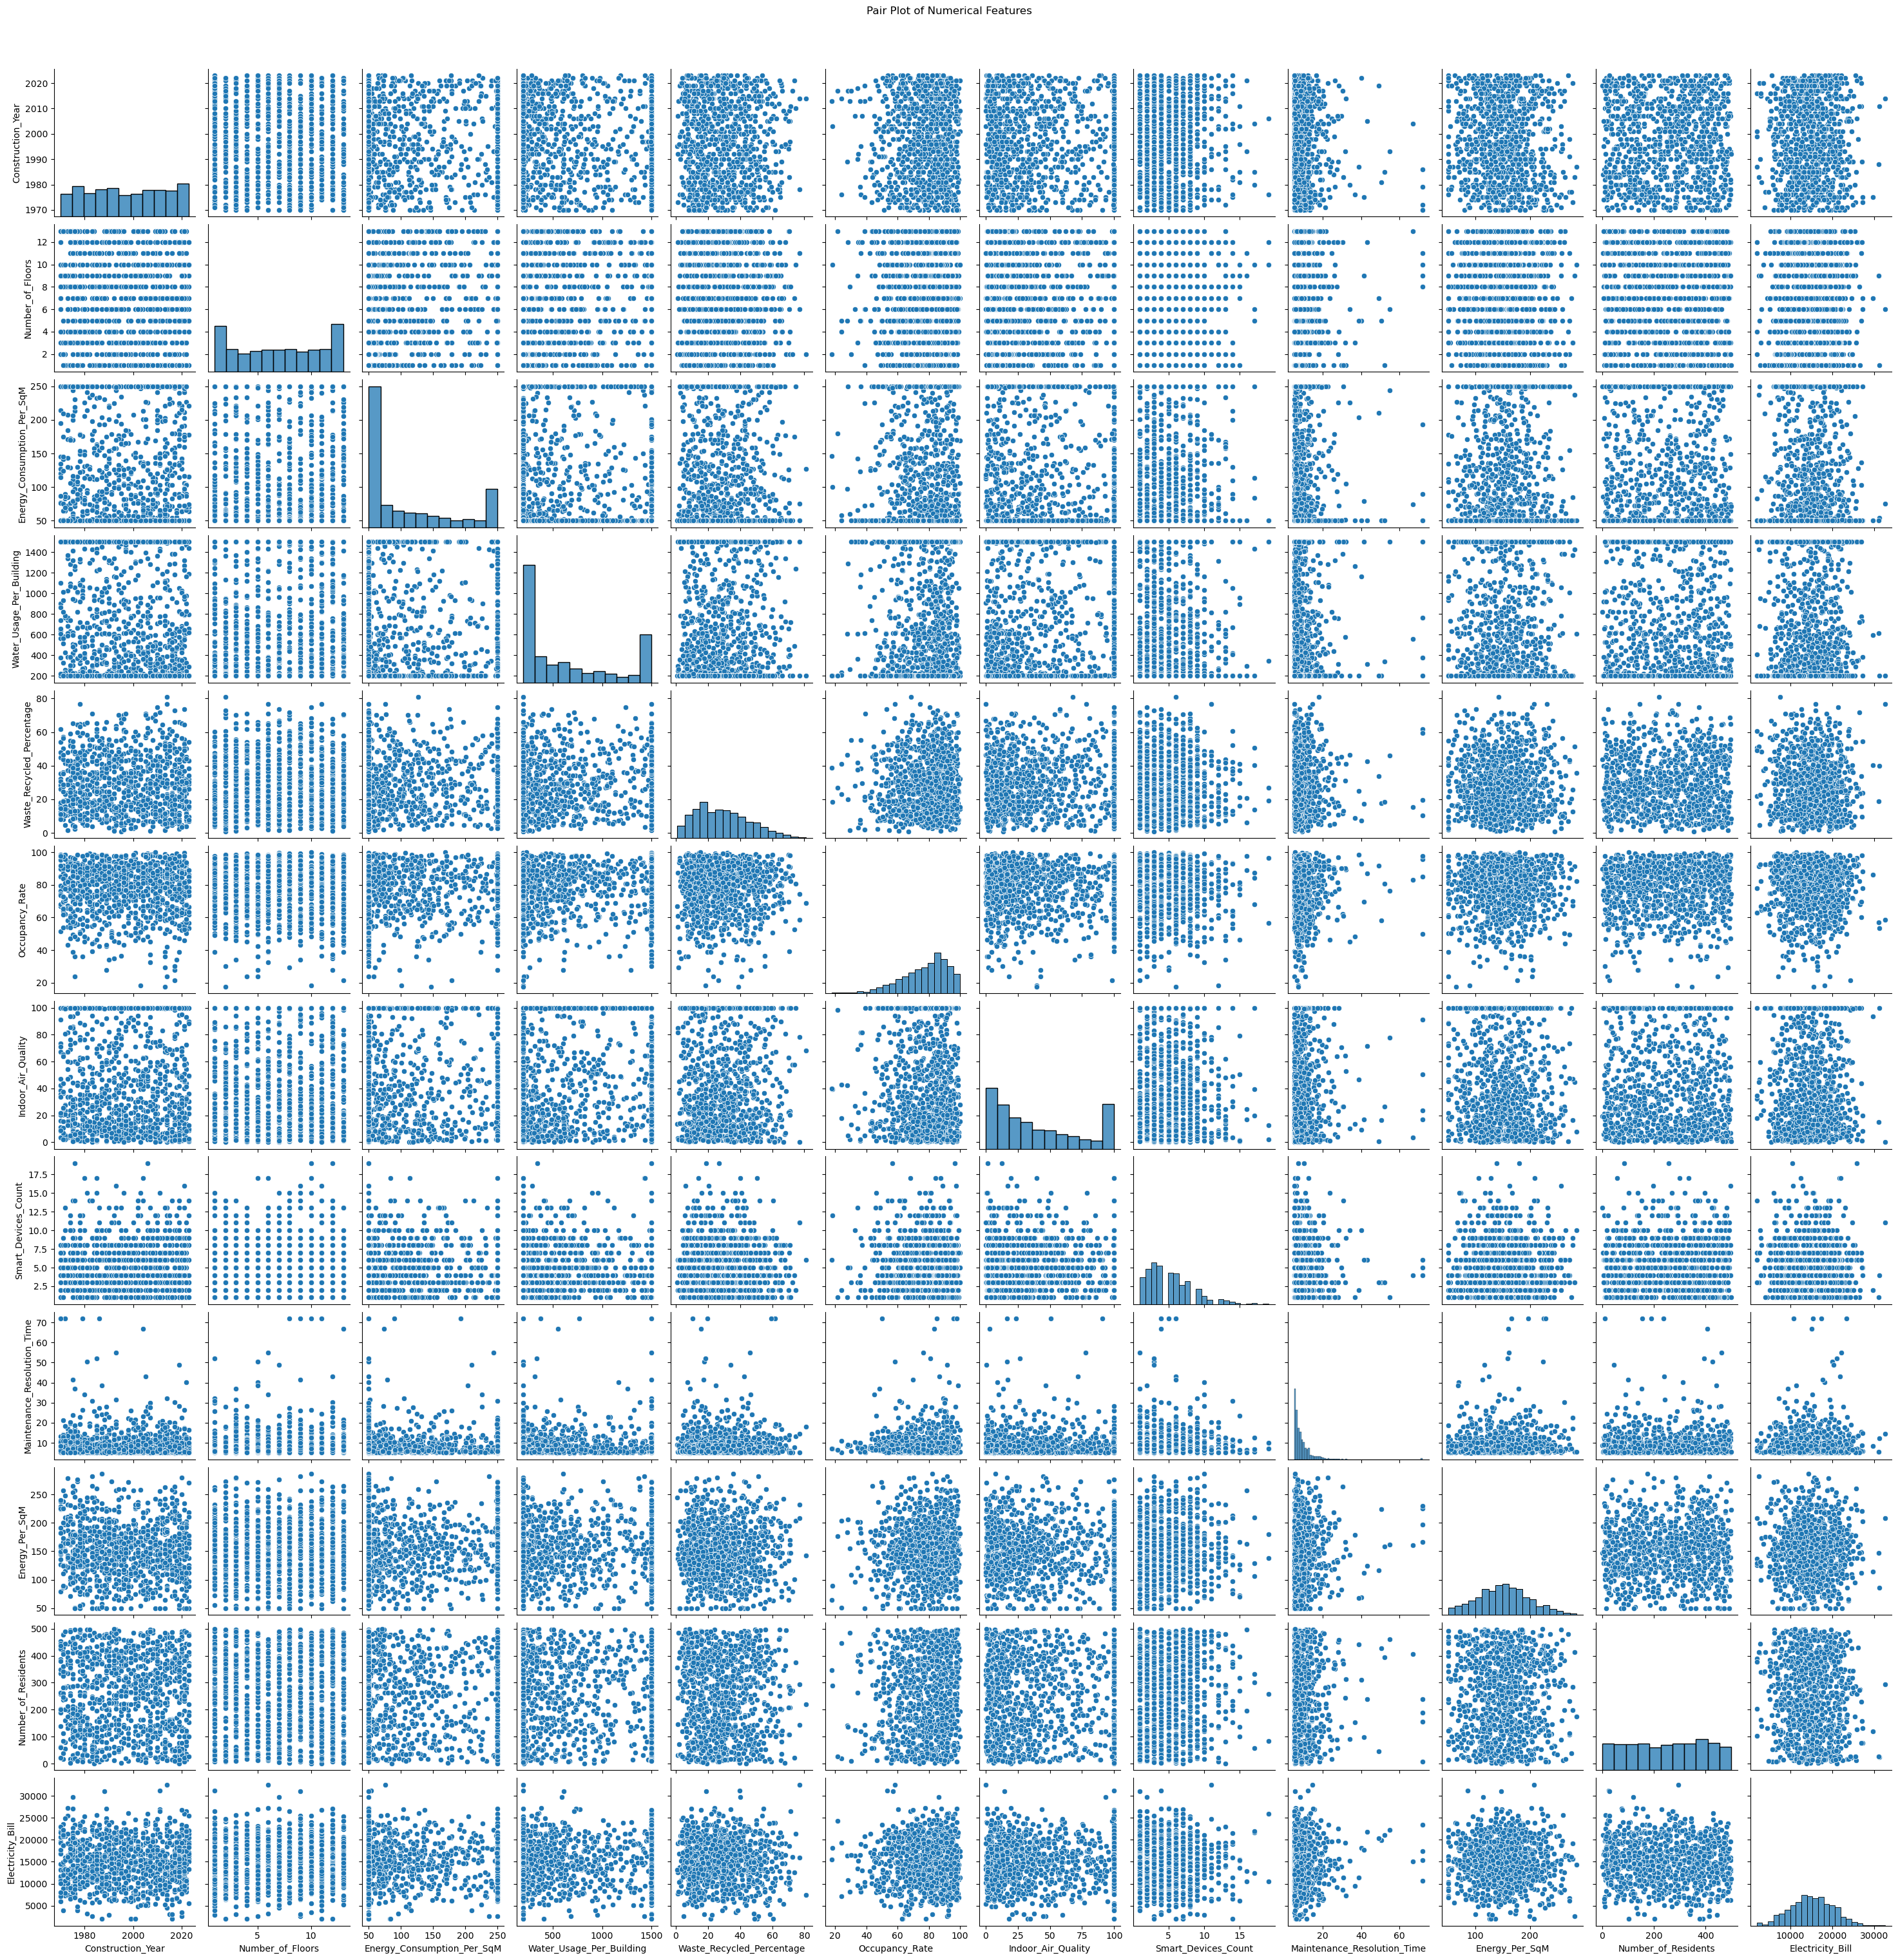

In [5]:
plt.figure(figsize=(200, 200))
sns.pairplot(train_data)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


## Insights from Box Plots and violin of Numerical Features

- **Construction Year**: 
  - The distribution is approximately normal, with most buildings constructed around the year 1997.

- **Number of Floors**: 
  - The data follows a roughly normal distribution centered around 7 floors.

- **Energy Consumption per Square Meter**: 
  - Values are concentrated in the lower range, mostly between 50 and 100, indicating lower energy usage in most buildings.

- **Water Usage per Building**: 
  - Water usage is skewed towards lower values, primarily ranging from 200 to 600 units.

- **Water Recycled Percentage**: 
  - The data is slightly left-skewed, with most buildings recycling between 20% to 40% of water.

- **Occupancy Rate**: 
  - The distribution is right-skewed, showing a high concentration of outliers, with most values on the lower end.

- **Indoor Air Quality**: 
  - Skewed to the left, air quality values are concentrated between 10 to 30, with a similar number of values in the 30 to 65 range.

- **Smart Device Count**: 
  - The average is around 5 devices, with a long right tail indicating higher counts in some cases.

- **Maintenance Resolution Time**: 
  - This feature shows left-skewness, with most resolution times between 5 to 12, and a long right tail.

- **Energy Consumption per Square Meter**: 
  - Slightly skewed towards lower values, with a concentration around 150.

- **Number of Residents**: 
  - The distribution leans slightly to the left, with most values clustering around 270 residents.

- **Electricity Bill**: 
  - The average bill is around 15,000, with a slight skew to the left, indicating some variability in higher bills.


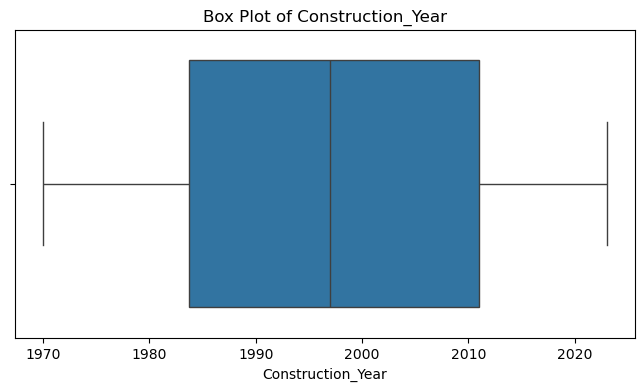

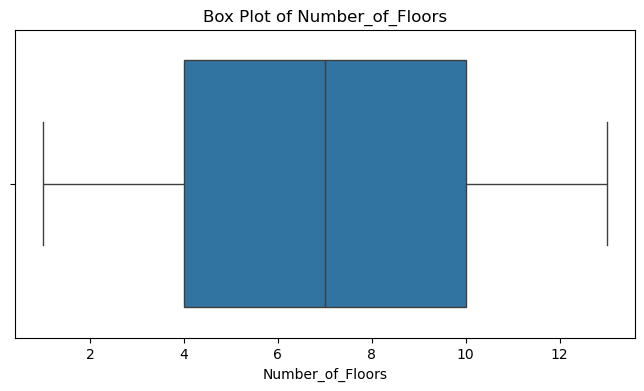

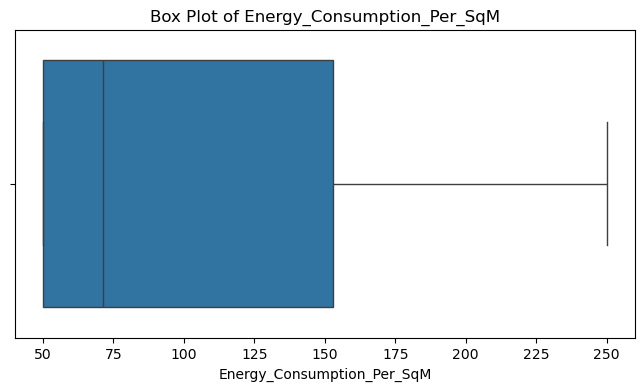

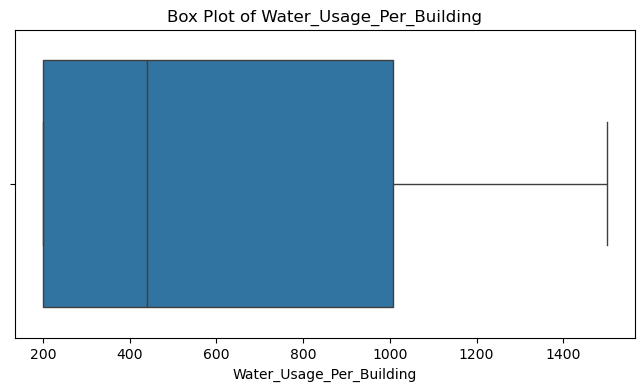

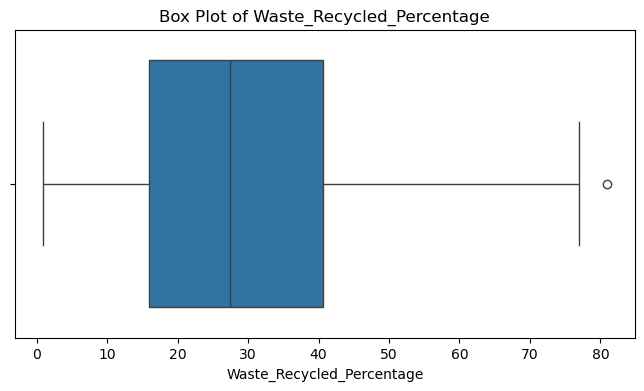

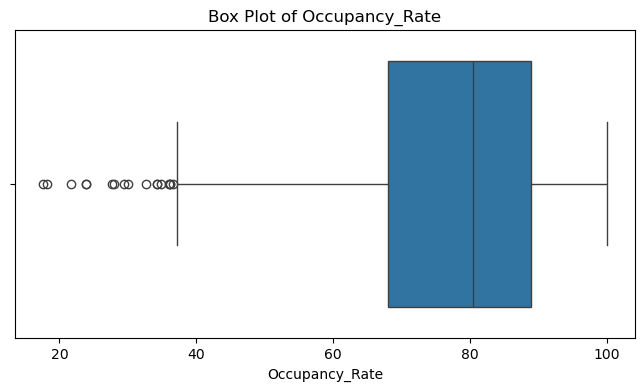

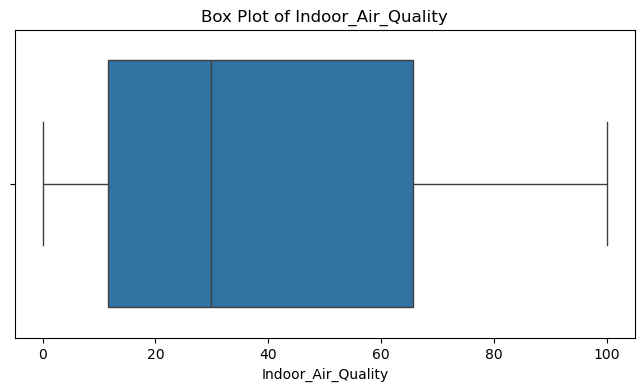

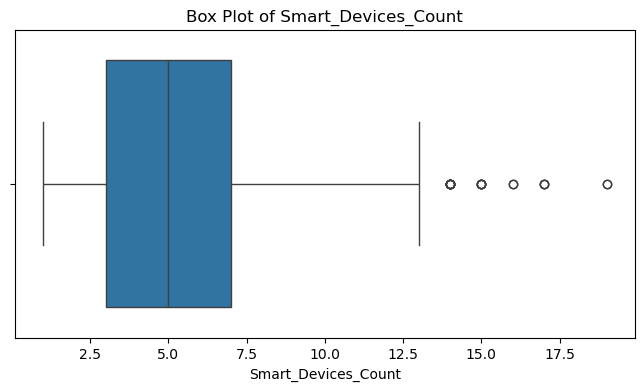

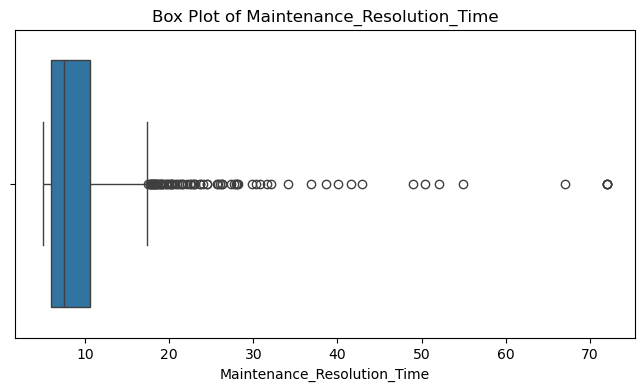

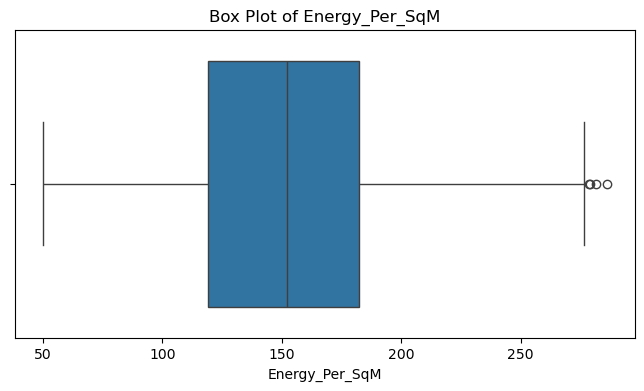

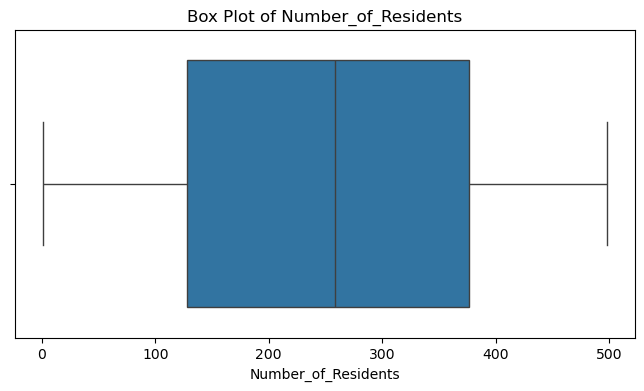

In [6]:
for col in X.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_data[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


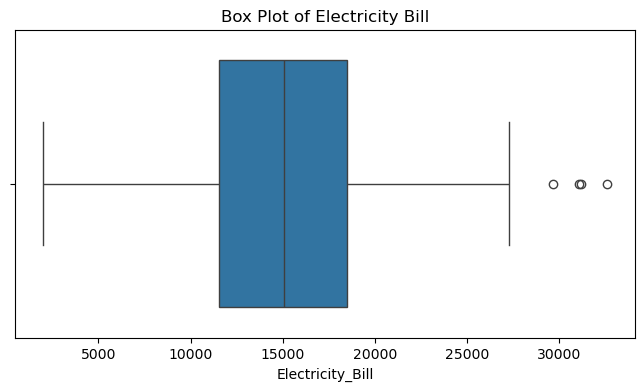

In [7]:
# plot box plot of y variable

plt.figure(figsize=(8, 4))
sns.boxplot(x=train_data['Electricity_Bill'])
plt.title("Box Plot of Electricity Bill")
plt.show()


# Violen plots individually

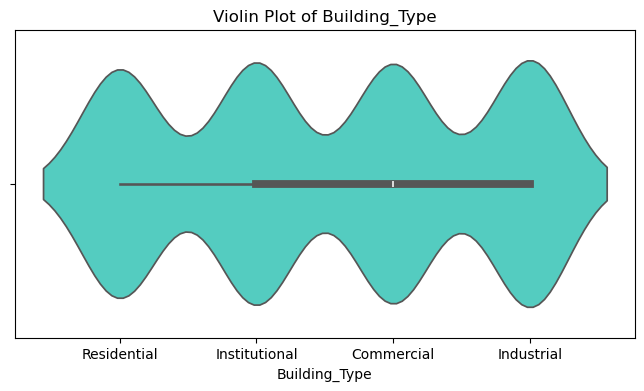

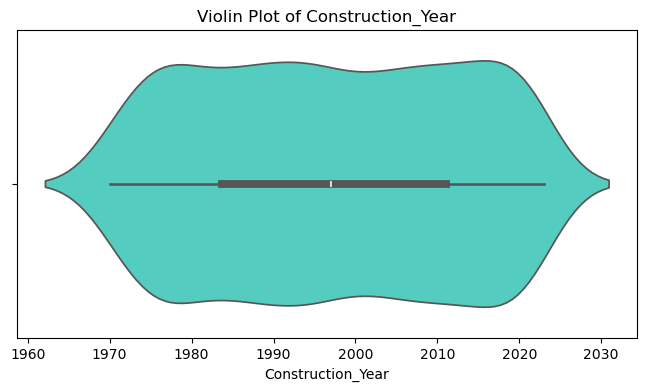

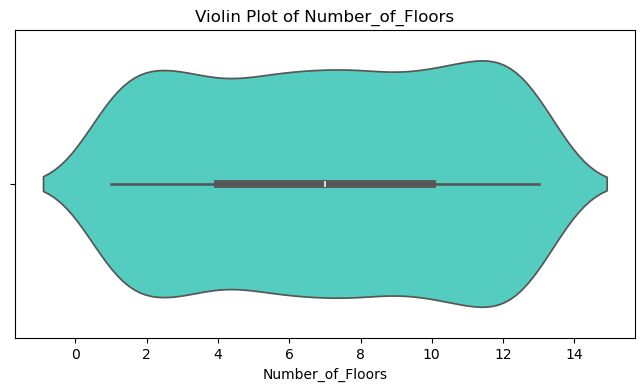

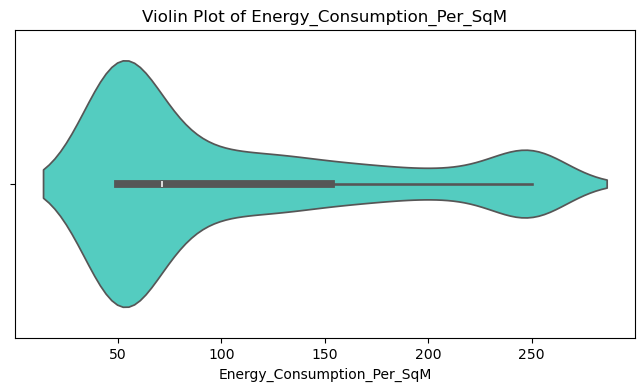

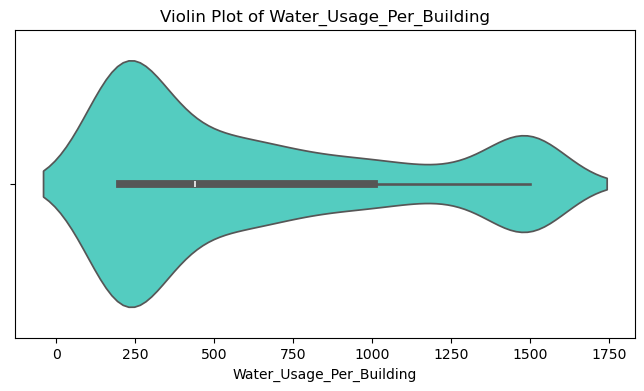

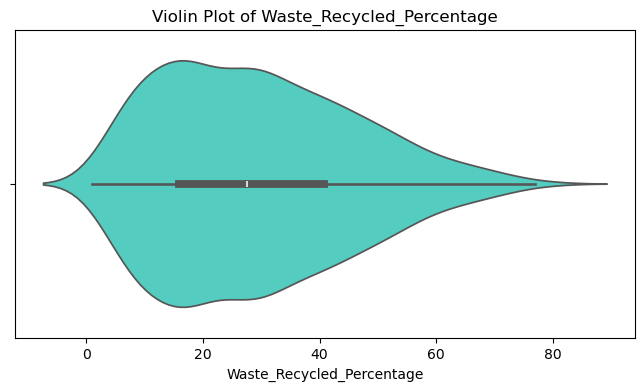

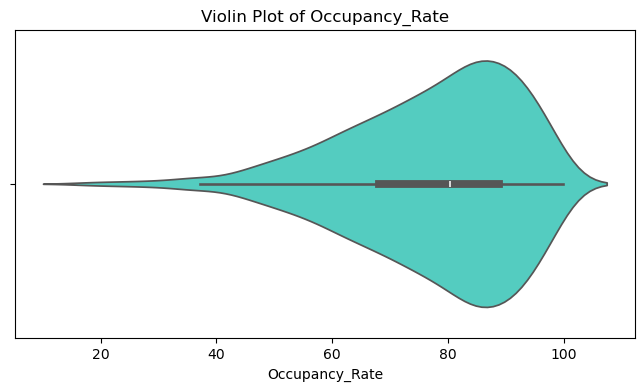

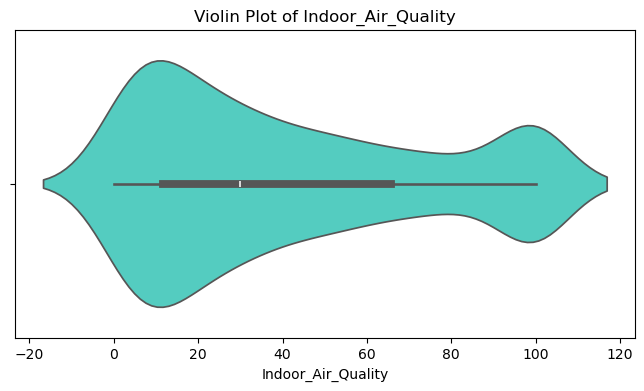

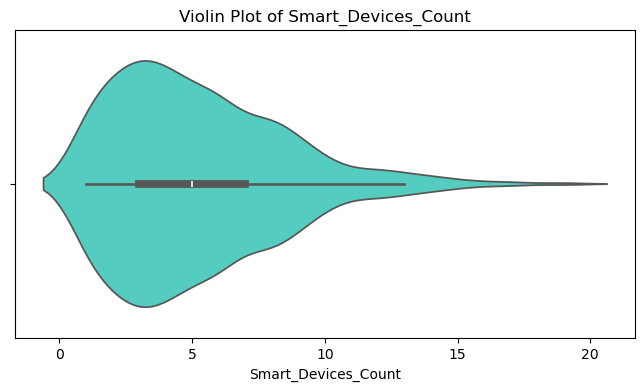

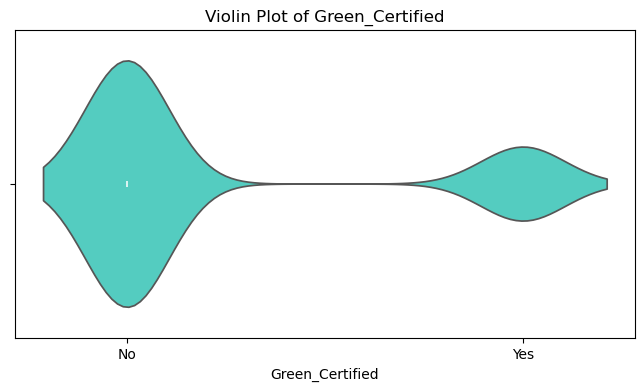

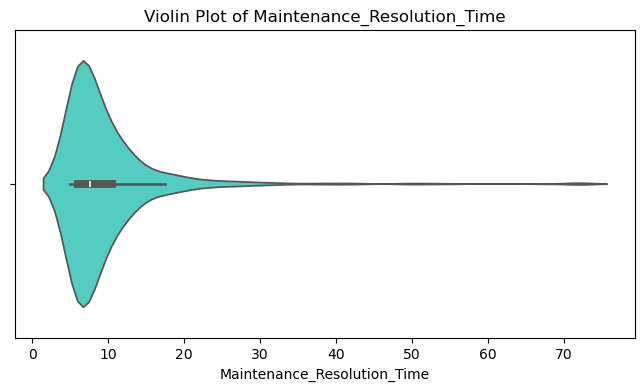

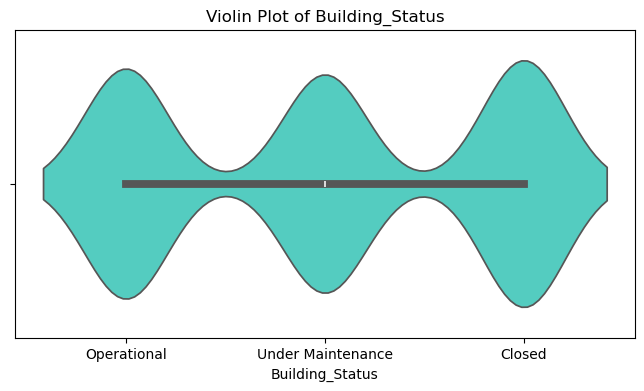

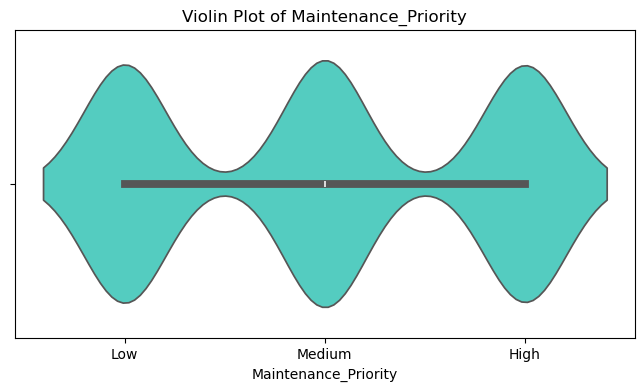

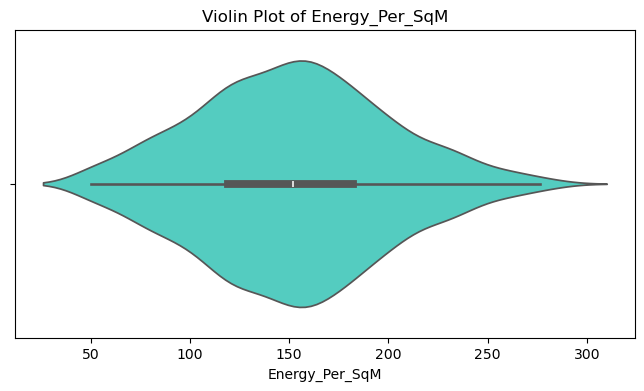

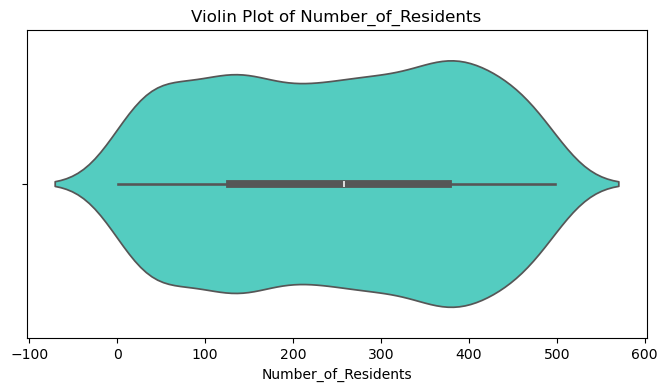

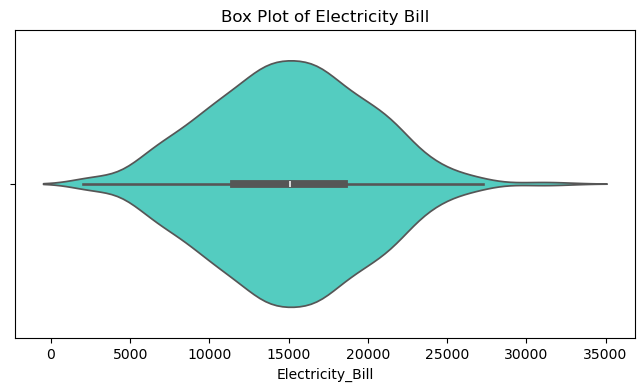

In [8]:
for col in  X.columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=train_data[col],color='turquoise')
    plt.title(f"Violin Plot of {col}")
    plt.show()
plt.figure(figsize=(8, 4))
sns.violinplot(x=train_data['Electricity_Bill'],color='turquoise')
plt.title("Box Plot of Electricity Bill")
plt.show()


## Inference from Count Plot of Categorical Features

- **Building Type**: 
  - The distribution of building types is relatively balanced across residential, institutional, commercial, and industrial categories.

- **Green Certified**: 
  - There are more non-green-certified buildings (`0`) compared to green-certified buildings (`1`), indicating fewer buildings meet green certification criteria.

- **Building Status**: 
  - There is minimal variation in building status, with most buildings categorized as "closed."

- **Maintenance Priority**: 
  - Maintenance priority appears to be evenly distributed across the different priority levels.


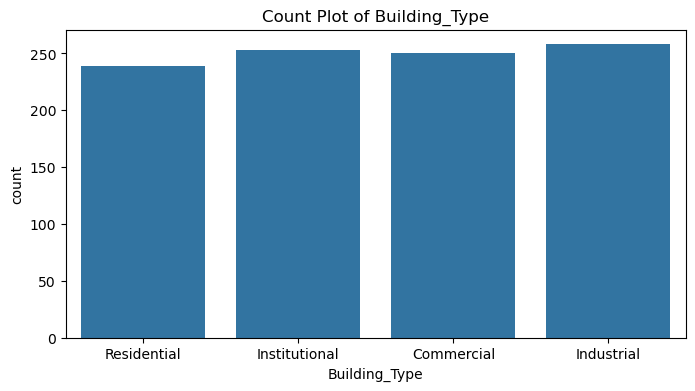

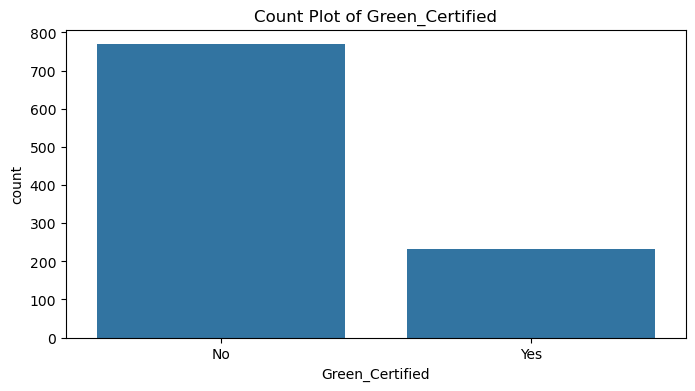

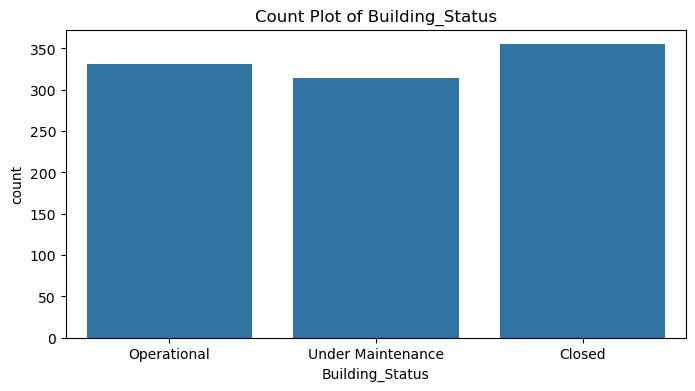

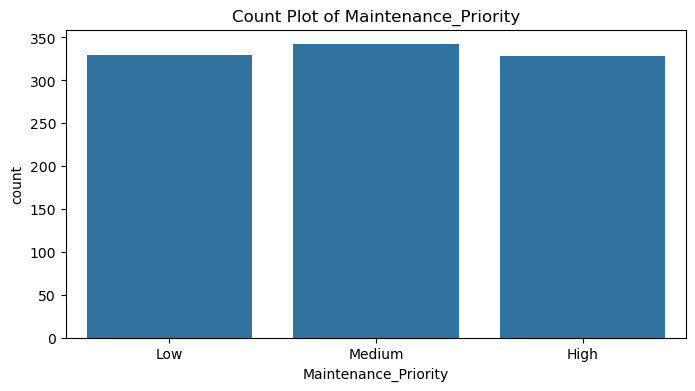

In [9]:
# plot count plot of categorical features
categorical_features = X.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=train_data[feature])
    plt.title(f"Count Plot of {feature}")
    plt.show()

## Standardising the numerical features so that their violin and box plot can be printed on one axis 

In [10]:
# Select numerical features
numerical_features = X.select_dtypes(include=[np.number]).columns
# Standardize the features
scaler = StandardScaler()
X_train_standardized = pd.DataFrame(scaler.fit_transform(train_data[numerical_features]), columns=numerical_features)
# Inspect the standardized data
print(X_train_standardized.head())


   Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0          -0.194382          1.300569                   -0.807078   
1          -0.830450          1.564216                   -0.807078   
2           0.505292         -0.808604                   -0.807078   
3          -1.466517         -1.599544                   -0.807078   
4          -0.830450          1.036922                    1.969636   

   Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                 -0.121631                   0.839266        0.198607   
1                  0.685145                  -0.842379       -1.119436   
2                  1.783092                   0.459648        0.858335   
3                  1.139766                  -1.063526       -0.210776   
4                 -0.829188                  -0.826465       -1.187105   

   Indoor_Air_Quality  Smart_Devices_Count  Maintenance_Resolution_Time  \
0           -1.022175            -0.060540                 

# All the variables distributions 

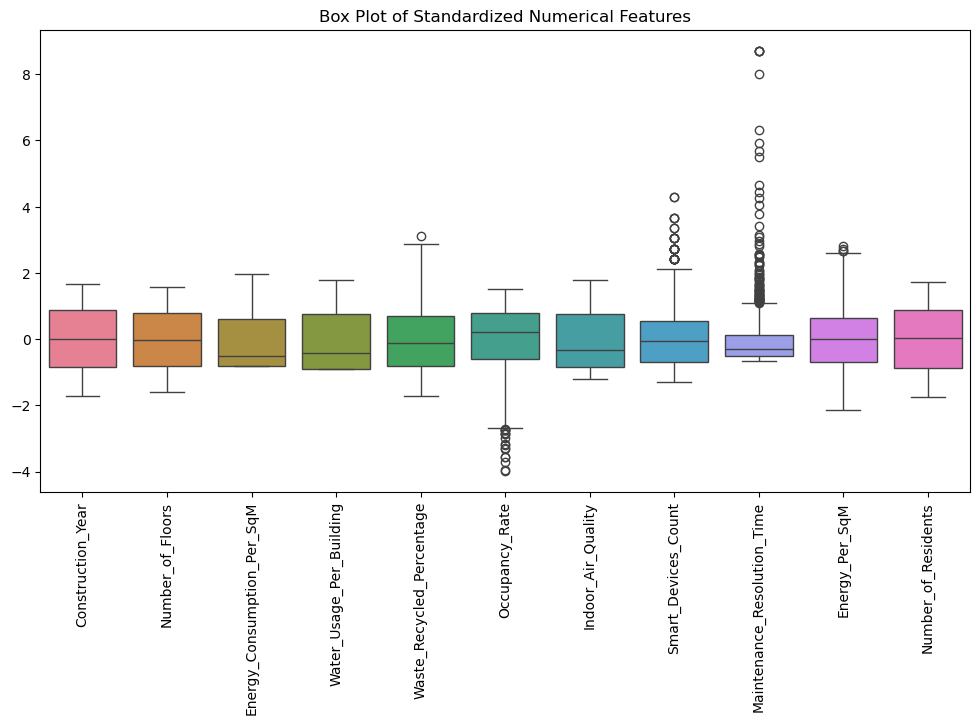

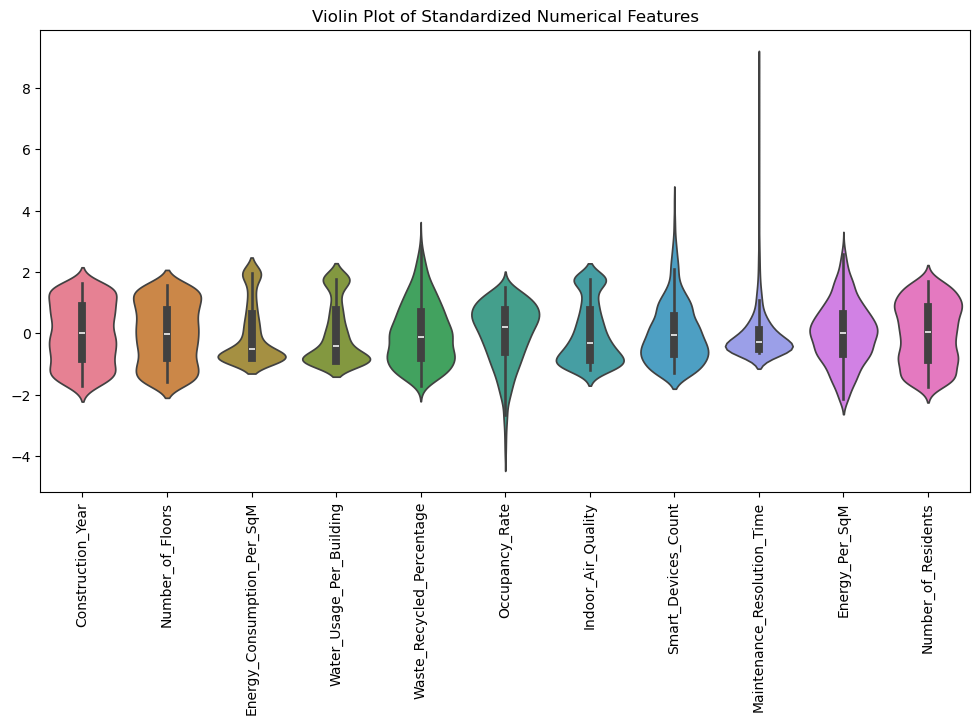

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_standardized)
plt.title("Box Plot of Standardized Numerical Features")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=X_train_standardized)
plt.title(f"Violin Plot of Standardized Numerical Features")
plt.xticks(rotation=90)
plt.show()


# Correlation Heatmap

C:\Users\halog\AppData\Local\Temp\ipykernel_27488\2524417476.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


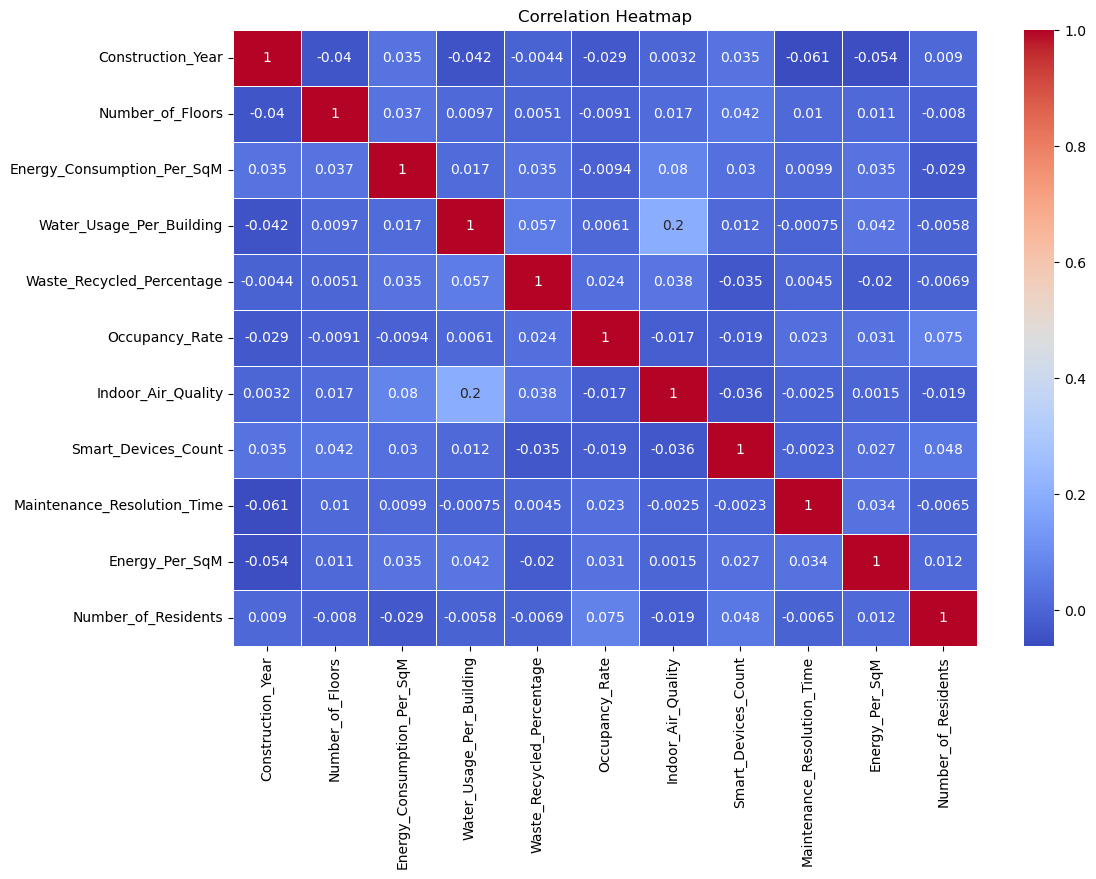

In [12]:
# not including the categorical features
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Inferences from the Correlation Heatmap

1. **Occupancy Rate and Number of Residents (0.075)**
   - There is a mild positive correlation between the occupancy rate and the number of residents. This makes sense as higher occupancy rates generally suggest more people using the building, which would increase the number of residents.

2. **Indoor Air Quality and Water Usage per Building (0.2)**
   - A moderate positive correlation is visible between indoor air quality and water usage per building. This might indicate that buildings with better air quality management also tend to focus on resource management, like water.

3. **Number of Floors and Smart Devices Count (0.042)**
   - There's a weak positive correlation between the number of floors and the count of smart devices. Taller buildings may require more smart devices for things like security, lighting, and other automated systems.

4. **Energy Consumption per SqM and Indoor Air Quality (0.08)**
   - A mild positive correlation suggests that energy consumption is somewhat linked to indoor air quality. This makes sense as maintaining better air quality often involves HVAC systems, which can consume significant energy.

5. **Maintenance Resolution Time and Construction Year (-0.061)**
   - A weak negative correlation shows that older buildings (constructed earlier) might have longer maintenance resolution times. This is intuitive because older buildings tend to have more wear and tear, leading to more complex or frequent repairs.

# UMAP reducing plotting 

### Updated Inference from UMAP Dimensionality Reduction Plot

1. **Cluster Formation:**
   - There is a **distinct cluster** in the **bottom left** and another in the **top right** of the plot. This suggests that the UMAP has successfully identified groups of similar data points in the high-dimensional space, which are projected into these two distinct regions in the 2D space.
   
2. **Bottom Left Cluster:**
   - The cluster in the bottom left has a higher density of points, which may indicate a group of data points with more similar features. This could represent a subgroup or segment in your data with shared characteristics.

3. **Top Right Cluster:**
   - Similarly, the top right cluster represents another distinct group of data points. Given the separation from the bottom left, it implies that the points in this cluster are different from those in the bottom left based on the original feature space.

4. **Inference from Color Gradient and Target:**
   - Although the color gradient represents the target variable, it doesn't seem to correlate well with the identified clusters. Both clusters show a mix of colors, suggesting that the target values are more **evenly spread across** the data rather than being concentrated in certain areas.
   - This could imply that the clusters formed by UMAP are more strongly influenced by other features in the data, rather than the target variable itself.



c:\Users\halog\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(1000,)
(1000,)
(1000,)


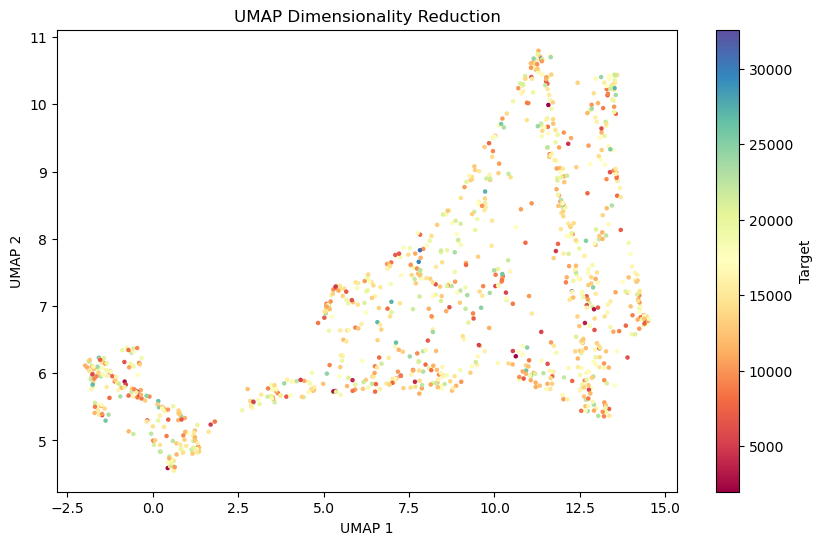

In [13]:
# Prepare the data for UMAP (ensure categorical features are encoded)
# train_data_encoded = train_data.copy()
# for feature in categorical_features:
#     le = LabelEncoder()
#     train_data_encoded[feature] = le.fit_transform(train_data_encoded[feature])
# Apply UMAP to reduce dimensions to 2
# numerical_features_only = X.select_dtypes(include=[np.number])
# numerical_features_only.drop(columns=['Green_Certified'])
# Adjust UMAP parameters
umap_reducer = umap.UMAP(n_components=2, n_neighbors=50,  random_state=0)
embedding = umap_reducer.fit(X.select_dtypes(include=[np.number])).embedding_
print (embedding[:,0].shape)
print (embedding[:,1].shape)
print (y.shape)
# Scatter plot of the UMAP embedding
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.colorbar(label='Target')
plt.title("UMAP Dimensionality Reduction")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()



In [14]:
print(data.isnull().sum())

Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64


### no null values 

In [25]:
# label encoder on categorical features on both train and test data
#normalize the numerical features
# X = data.drop(columns=['Electricity_Bill'])
#from numerical features remove column name Green_Certified
numerical_features = X.select_dtypes(include=[np.number]).columns
# numerical_features = numerical_features.drop('Green_Certified')
print(numerical_features)
X_Train = X.copy()
X_Test = X_test.copy()
X_Train_Copy = X_Train.copy()
X_Test_Copy = X_Test.copy()
normalizer = StandardScaler()
X[numerical_features] = normalizer.fit_transform(X[numerical_features])
X_test[numerical_features] = normalizer.transform(X_test[numerical_features])

    
# revert changes of green certified yes as 1 and no as 0 
X['Green_Certified'] = X['Green_Certified'].replace('Yes', 1)
X['Green_Certified'] = X['Green_Certified'].replace('No', 0)
X_test['Green_Certified'] = X_test['Green_Certified'].replace('Yes', 1)
X_test['Green_Certified'] = X_test['Green_Certified'].replace('No', 0)

le = LabelEncoder()

for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])
    X_test[feature] = le.transform(X_test[feature])


print(X.head())
print(X_test.head())

Index(['Building_Type', 'Construction_Year', 'Number_of_Floors',
       'Energy_Consumption_Per_SqM', 'Water_Usage_Per_Building',
       'Waste_Recycled_Percentage', 'Occupancy_Rate', 'Indoor_Air_Quality',
       'Smart_Devices_Count', 'Green_Certified', 'Maintenance_Resolution_Time',
       'Building_Status', 'Maintenance_Priority', 'Energy_Per_SqM',
       'Number_of_Residents'],
      dtype='object')
      Building_Type  Construction_Year  Number_of_Floors  \
1194       1.370953          -0.194382          1.300569   
911        0.468416          -0.830450          1.564216   
422        0.468416           0.505292         -0.808604   
670        1.370953          -1.466517         -1.599544   
931       -1.336656          -0.830450          1.036922   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                   -0.807078                 -0.121631   
911                    -0.807078                  0.685145   
422                    -0.807078              

In [26]:
# Apply Linear Regression on the preprocessed data
model = LinearRegression()
model.fit(X, y)
print("--------------------------------------------------------")
print("Test data Model Evaluation")
print("--------------------------------------------------------")
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
#adjusted R2
n = len(X_test)
p = len(X.columns)
a_r2 = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {a_r2}")
print("--------------------------------------------------------")

print("Train data Model Evaluation")
print("--------------------------------------------------------")
# Make predictions
y_pred = model.predict(X)

# Evaluate the model on the train data
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
print(f"R2 Score: {r2_score(y, y_pred)}")
#adjusted R2
n = len(X_Test)
p = len(X.columns)
a_r2 = 1 - (1 - r2_score(y, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {a_r2}")
print("--------------------------------------------------------")


# --------------------------------------------------------
# Test data Model Evaluation
# --------------------------------------------------------
# Mean Squared Error: 24278016.155742623
# Root Mean Squared Error: 4927.272689403604
# Mean Absolute Error: 3842.4093125585155
# R2 Score: 3.7344733075372893e-05
# Adjusted R2 Score: -0.0640628254763429
# --------------------------------------------------------
# Train data Model Evaluation
# --------------------------------------------------------
# Mean Squared Error: 24475013.16847547
# Root Mean Squared Error: 4947.222773281538
# Mean Absolute Error: 4006.3284693293604
# R2 Score: 0.013922520844610209
# Adjusted R2 Score: -0.04928757397304295
# --------------------------------------------------------




--------------------------------------------------------
Test data Model Evaluation
--------------------------------------------------------
Mean Squared Error: 24278016.155742623
Root Mean Squared Error: 4927.272689403604
Mean Absolute Error: 3842.409312558516
R2 Score: 3.7344733075372893e-05
Adjusted R2 Score: -0.0640628254763429
--------------------------------------------------------
Train data Model Evaluation
--------------------------------------------------------
Mean Squared Error: 24475013.16847547
Root Mean Squared Error: 4947.222773281538
Mean Absolute Error: 4006.3284693293604
R2 Score: 0.013922520844610209
Adjusted R2 Score: -0.04928757397304295
--------------------------------------------------------


# Feature Selection using Recursive Feature Elimination

In [27]:

# Select the top 3 features using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Apply Linear Regression on the selected features
model = LinearRegression()
model.fit(X[selected_features], y)
print("--------------------------------------------------------")
print("Test data Model Evaluation")
print("--------------------------------------------------------")
# Make predictions
y_pred = model.predict(X_test[selected_features])

# Evaluate the model using the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
n = len(X_Test[selected_features])
p = len(X_Test[selected_features].columns)
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {adj_r2}")

print("--------------------------------------------------------")
print("Train data Model Evaluation")
print("--------------------------------------------------------")
y_pred = model.predict(X[selected_features])

# Evaluate the model on the train data
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
print(f"R2 Score: {r2_score(y, y_pred)}")
#adjusted R2
n = len(X_Test)
p = len(X.columns)
a_r2 = 1 - (1 - r2_score(y, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {a_r2}")
print("--------------------------------------------------------")

# Selected Features: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')
# --------------------------------------------------------
# Test data Model Evaluation
# --------------------------------------------------------
# Mean Squared Error: 23941409.06299838
# Root Mean Squared Error: 4892.995918964002
# Mean Absolute Error: 3813.948128176773
# R2 Score: 0.013901513867940918
# Adjusted R2 Score: 0.0018759225736475482
# --------------------------------------------------------
# Train data Model Evaluation
# --------------------------------------------------------
# Mean Squared Error: 24569032.906897984
# Root Mean Squared Error: 4956.715939702212
# Mean Absolute Error: 4006.473377514736
# R2 Score: 0.010134545491284008
# Adjusted R2 Score: -0.05331836825927461
# --------------------------------------------------------


Selected Features: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')
--------------------------------------------------------
Test data Model Evaluation
--------------------------------------------------------
Mean Squared Error: 23941409.06299838
Root Mean Squared Error: 4892.995918964002
Mean Absolute Error: 3813.948128176773
R2 Score: 0.013901513867940918
Adjusted R2 Score: 0.0018759225736475482
--------------------------------------------------------
Train data Model Evaluation
--------------------------------------------------------
Mean Squared Error: 24569032.90689799
Root Mean Squared Error: 4956.715939702212
Mean Absolute Error: 4006.4733775147365
R2 Score: 0.010134545491283897
Adjusted R2 Score: -0.05331836825927483
--------------------------------------------------------


# One Hot encoding and ridge regression 

In [28]:
categorical_features = X_Train_Copy.select_dtypes(include=['object']).columns
# print(categorical_features)
X_Train_Copy = pd.get_dummies(X_Train_Copy, columns=categorical_features, drop_first=True)
X_Test_Copy = pd.get_dummies(X_Test_Copy, columns=categorical_features, drop_first=True)

print(X_Train_Copy.head())
model = Ridge(alpha=50)
model.fit(X_Train_Copy, y)

# Make predictions
y_pred = model.predict(X_Test_Copy)

# Evaluate the model
print("--------------------------------------------------------")

print("Test data Model Evaluation")
print("--------------------------------------------------------")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
#adjusted R2
n = len(X_test)
p = len(X.columns)
a_r2 = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {a_r2}")
print("--------------------------------------------------------")

print("Train data Model Evaluation")
print("--------------------------------------------------------")
# Make predictions
y_pred = model.predict(X_Train_Copy)

# Evaluate the model on the train data
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
print(f"R2 Score: {r2_score(y, y_pred)}")
#adjusted R2
n = len(X_Test)
p = len(X.columns)
a_r2 = 1 - (1 - r2_score(y, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {a_r2}")
print("--------------------------------------------------------")

# --------------------------------------------------------
# Test data Model Evaluation
# --------------------------------------------------------
# Mean Squared Error: 24297993.52262162
# Root Mean Squared Error: 4929.299496137522
# Mean Absolute Error: 3841.971035551928
# R2 Score: -0.0007854828283453408
# Adjusted R2 Score: -0.06493839839426485
# --------------------------------------------------------
# Train data Model Evaluation
# --------------------------------------------------------
# Mean Squared Error: 24479024.10274285
# Root Mean Squared Error: 4947.628128986944
# Mean Absolute Error: 4003.457002610622
# R2 Score: 0.013760923711885087
# Adjusted R2 Score: -0.0494595298963274
# --------------------------------------------------------




      Building_Type  Construction_Year  Number_of_Floors  \
1194              3          -0.194382          1.300569   
911               2          -0.830450          1.564216   
422               2           0.505292         -0.808604   
670               3          -1.466517         -1.599544   
931               0          -0.830450          1.036922   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                   -0.807078                 -0.121631   
911                    -0.807078                  0.685145   
422                    -0.807078                  1.783092   
670                    -0.807078                  1.139766   
931                     1.969636                 -0.829188   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
1194                   0.839266        0.198607           -1.022175   
911                   -0.842379       -1.119436           -1.144787   
422                    0.459648        0.858335      

# Independent Component Analysis

In [34]:
# Perform Independent Component Analysis (ICA) on the one-hot encoded
# dataset and choose the appropriate number of components (try 4, 5, 6, and 8
# components). Compare the results (MSE, RMSE, R2 score, Adjusted R2 score,
# MAE) on the train and test dataset




n_components = [4,5, 6, 8 ]

for nc in n_components:
    # Perform ICA
    ica = FastICA(n_components=nc, random_state=42)
    X_train_ica = ica.fit_transform(X_Train_Copy)
    X_test_ica = ica.transform(X_Test_Copy)

    model = LinearRegression()
    model.fit(X_train_ica, y)

    # Make predictions
    y_pred = model.predict(X_test_ica)

    print("--------------------------------------------------------")
    print(f"Test data Model Evaluation with {nc} components")
    print("--------------------------------------------------------")

    mse = mean_squared_error(y_test, y_pred)
    # print(f"Number of Components: {n}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")

    n = len(X_test_ica)
    p = len(X_test_ica[0])
    a_r2 = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R2 Score: {a_r2}")

    print("--------------------------------------------------------")
    print(f"Train data Model Evaluation with {nc} components")
    print("--------------------------------------------------------")
    y_pred = model.predict(X_train_ica)
    mse = mean_squared_error(y, y_pred)
    # print(f"Number of Components: {n}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
    print(f"R2 Score: {r2_score(y, y_pred)}")

    #adjusted R2
    n = len(X_test_ica)
    p = len(X_test_ica[0])
    adj_r2 = 1 - (1 - r2_score(y, y_pred)) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R2 Score: {adj_r2}")
# Perform Independent Component Analysis (ICA) on the one-hot encoded
# dataset and choose the appropriate number of components (try 4, 5, 6, and 8
# components). Compare the results (MSE, RMSE, R2 score, Adjusted R2 score,
# MAE) on the train and test dataset




n_components = [4,5, 6, 8 ]

for nc in n_components:
    # Perform ICA
    ica = FastICA(n_components=nc, random_state=42)
    X_train_ica = ica.fit_transform(X_Train_Copy)
    X_test_ica = ica.transform(X_Test_Copy)

    model = LinearRegression()
    model.fit(X_train_ica, y)

    # Make predictions
    y_pred = model.predict(X_test_ica)

    print("--------------------------------------------------------")
    print(f"Test data Model Evaluation with {nc} components")
    print("--------------------------------------------------------")

    mse = mean_squared_error(y_test, y_pred)
    # print(f"Number of Components: {n}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")

    n = len(X_test_ica)
    p = len(X_test_ica[0])
    a_r2 = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R2 Score: {a_r2}")

    print("--------------------------------------------------------")
    print(f"Train data Model Evaluation with {nc} components")
    print("--------------------------------------------------------")
    y_pred = model.predict(X_train_ica)
    mse = mean_squared_error(y, y_pred)
    # print(f"Number of Components: {n}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
    print(f"R2 Score: {r2_score(y, y_pred)}")

    #adjusted R2
    n = len(X_test_ica)
    p = len(X_test_ica[0])
    adj_r2 = 1 - (1 - r2_score(y, y_pred)) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R2 Score: {adj_r2}")
# --------------------------------------------------------
# Test data Model Evaluation with 4 components
# --------------------------------------------------------

# Mean Squared Error: 24167148.55980723
# Root Mean Squared Error: 4916.009414129231
# Mean Absolute Error: 3818.8948908953826
# R2 Score: 0.00460375802250701
# Adjusted R2 Score: -0.011647609193452091
# --------------------------------------------------------
# Train data Model Evaluation with 4 components
# --------------------------------------------------------
# Number of Components: 250
# Mean Squared Error: 24701058.64312741
# Root Mean Squared Error: 4970.0159600475545
# Mean Absolute Error: 4010.9948262599873
# R2 Score: 0.004815340787752587
# Adjusted R2 Score: -0.011432572015712683
# --------------------------------------------------------
# Test data Model Evaluation with 6 components
# --------------------------------------------------------
# Number of Components: 250
# Mean Squared Error: 24253843.58669414
# Root Mean Squared Error: 4924.819142536519
# Mean Absolute Error: 3829.863122154948
# R2 Score: 0.00103296423407917
# Adjusted R2 Score: -0.023632888500881855
# --------------------------------------------------------
# Train data Model Evaluation with 6 components
# --------------------------------------------------------
# Number of Components: 250
# Mean Squared Error: 24682728.593817994
# Root Mean Squared Error: 4968.171554386784
# Mean Absolute Error: 4009.407380941633
# R2 Score: 0.005553842895653638
# Adjusted R2 Score: -0.01900038320568842
# --------------------------------------------------------
# Test data Model Evaluation with 8 components
# --------------------------------------------------------
# Number of Components: 250
# Mean Squared Error: 24222157.591222916
# Root Mean Squared Error: 4921.601120694659
# Mean Absolute Error: 3830.142528762388
# R2 Score: 0.002338046657738735
# Adjusted R2 Score: -0.030779362581838443
# --------------------------------------------------------
# Train data Model Evaluation with 8 components
# --------------------------------------------------------
# Number of Components: 250
# Mean Squared Error: 24674425.985024825
# Root Mean Squared Error: 4967.335904186954
# Mean Absolute Error: 4009.0456273983377
# R2 Score: 0.0058883479475130285
# Adjusted R2 Score: -0.027111208967092404
# --------------------------------------------------------
# Test data Model Evaluation with 2 components
# --------------------------------------------------------
# Number of Components: 250
# Mean Squared Error: 24224723.498766214
# Root Mean Squared Error: 4921.861791920433
# Mean Absolute Error: 3822.670124647236
# R2 Score: 0.0022323620868205385
# Adjusted R2 Score: -0.00584672809871134
# --------------------------------------------------------
# Train data Model Evaluation with 2 components
# --------------------------------------------------------
# Number of Components: 250
# Mean Squared Error: 24707153.090872984
# Root Mean Squared Error: 4970.629043780373
# Mean Absolute Error: 4010.455242410334
# R2 Score: 0.00456980066777668
# Adjusted R2 Score: -0.003490362889569276'







--------------------------------------------------------
Test data Model Evaluation with 4 components
--------------------------------------------------------
Mean Squared Error: 24411542.013435163
Root Mean Squared Error: 4940.803782122415
Mean Absolute Error: 3841.0333230084757
R2 Score: -0.005462316785744381
Adjusted R2 Score: -0.021878028080205558
--------------------------------------------------------
Train data Model Evaluation with 4 components
--------------------------------------------------------
Mean Squared Error: 24728066.308256026
Root Mean Squared Error: 4972.732277959072
Mean Absolute Error: 3995.9462547595294
R2 Score: 0.003727224913633198
Adjusted R2 Score: -0.012538453046960552
--------------------------------------------------------
Test data Model Evaluation with 5 components
--------------------------------------------------------
Mean Squared Error: 24512244.701701757
Root Mean Squared Error: 4950.984215456737
Mean Absolute Error: 3840.4085995638743
R2 Score: -

# ElasticNet regularization

In [30]:
# Use ElasticNet regularization (which combines L1 and L2) while train-
# ing a linear model on the preprocessed dataset from part (c). Compare the evalua-
# tion metrics (MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the test dataset
# for different values of the mixing parameter (alpha)

alphas = [0.1, 0.5, 1, 2, 5, 10]

for alpha in alphas:
    model = ElasticNet(alpha=alpha, random_state=42)
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X_test)
    print("--------------------------------------------------------")
    print(f"Test data Model Evaluation with alpha {alpha} ")
    print("--------------------------------------------------------")
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Alpha: {alpha}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    
    #adjusted R2
    n = len(X_test)
    p = len(X_test.columns)

    adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R2 Score: {adj_r2}")
    print("--------------------------------------------------------")
    print(f"Train data Model Evaluation with alpha {alpha} ")
    print("--------------------------------------------------------")
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"Alpha: {alpha}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {np.sqrt(mse)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
    print(f"R2 Score: {r2_score(y, y_pred)}")
    #adjusted R2
    n = len(X_Test)
    p = len(X.columns)
    a_r2 = 1 - (1 - r2_score(y, y_pred)) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R2 Score: {a_r2}")
    print("--------------------------------------------------------")


# --------------------------------------------------------
# Test data Model Evaluation with alpha 0.1 
# --------------------------------------------------------
# Alpha: 0.1
# Mean Squared Error: 24297850.736953188
# Root Mean Squared Error: 4929.285012753187
# Mean Absolute Error: 3841.9557641155075
# R2 Score: -0.0007796017738463945
# Adjusted R2 Score: -0.064932140349093
# --------------------------------------------------------
# Train data Model Evaluation with alpha 0.1 
# --------------------------------------------------------
# Alpha: 0.1
# Mean Squared Error: 24479042.355369993
# Root Mean Squared Error: 4947.629973570173
# Mean Absolute Error: 4003.4524507780893
# R2 Score: 0.013760188329050571
# Adjusted R2 Score: -0.049460312419087105
# --------------------------------------------------------
# --------------------------------------------------------
# Test data Model Evaluation with alpha 0.5 
# --------------------------------------------------------
# Alpha: 0.5
# Mean Squared Error: 24325002.08038703
# Root Mean Squared Error: 4932.038329168482
# Mean Absolute Error: 3839.5575719159174
# R2 Score: -0.0018979110005972188
# Adjusted R2 Score: -0.06612213606473816
# --------------------------------------------------------
# Train data Model Evaluation with alpha 0.5 
# --------------------------------------------------------
# Alpha: 0.5
# Mean Squared Error: 24509803.248875715
# Root Mean Squared Error: 4950.737646944717
# Mean Absolute Error: 3999.9029413766116
# R2 Score: 0.012520858073500007
# Adjusted R2 Score: -0.05077908692178834
# --------------------------------------------------------
# --------------------------------------------------------
# Test data Model Evaluation with alpha 1 
# --------------------------------------------------------
# Alpha: 1
# Mean Squared Error: 24328092.851145104
# Root Mean Squared Error: 4932.351655259903
# Mean Absolute Error: 3838.932130313833
# R2 Score: -0.002025213631678513
# Adjusted R2 Score: -0.06625759912088869
# --------------------------------------------------------
# Train data Model Evaluation with alpha 1 
# --------------------------------------------------------
# Alpha: 1
# Mean Squared Error: 24543209.75685279
# Root Mean Squared Error: 4954.110390055191
# Mean Absolute Error: 3998.8062479753085
# R2 Score: 0.011174938259415956
# Adjusted R2 Score: -0.05221128364703165
# --------------------------------------------------------
# --------------------------------------------------------
# Test data Model Evaluation with alpha 2 
# --------------------------------------------------------
# Alpha: 2
# Mean Squared Error: 24326783.407200783
# Root Mean Squared Error: 4932.218913146575
# Mean Absolute Error: 3838.282628627851
# R2 Score: -0.0019712802692866127
# Adjusted R2 Score: -0.06620020849167685
# --------------------------------------------------------
# Train data Model Evaluation with alpha 2 
# --------------------------------------------------------
# Alpha: 2
# Mean Squared Error: 24593398.16430701
# Root Mean Squared Error: 4959.173133124817
# Mean Absolute Error: 3998.791188324756
# R2 Score: 0.009152889978395029
# Adjusted R2 Score: -0.054362950407605304
# --------------------------------------------------------
# --------------------------------------------------------
# Test data Model Evaluation with alpha 5 
# --------------------------------------------------------
# Alpha: 5
# Mean Squared Error: 24331970.147802267
# Root Mean Squared Error: 4932.744687068475
# Mean Absolute Error: 3838.8232089136845
# R2 Score: -0.0021849116826100357
# Adjusted R2 Score: -0.06642753422636716
# --------------------------------------------------------
# Train data Model Evaluation with alpha 5 
# --------------------------------------------------------
# Alpha: 5
# Mean Squared Error: 24675765.089183595
# Root Mean Squared Error: 4967.470693339176
# Mean Absolute Error: 4001.0908164720977
# R2 Score: 0.005834396579065704
# Adjusted R2 Score: -0.057894167742789104
# --------------------------------------------------------
# --------------------------------------------------------
# Test data Model Evaluation with alpha 10 
# --------------------------------------------------------
# Alpha: 10
# Mean Squared Error: 24341595.545353893
# Root Mean Squared Error: 4933.720254063245
# Mean Absolute Error: 3839.994081691005
# R2 Score: -0.0025813624482731168
# Adjusted R2 Score: -0.06684939850264948
# --------------------------------------------------------
# Train data Model Evaluation with alpha 10 
# --------------------------------------------------------
# Alpha: 10
# Mean Squared Error: 24731708.235630836
# Root Mean Squared Error: 4973.098454246692
# Mean Absolute Error: 4004.08504938946
# R2 Score: 0.0035804947549894495
# Adjusted R2 Score: -0.06029255045302406
# --------------------------------------------------------

    

--------------------------------------------------------
Test data Model Evaluation with alpha 0.1 
--------------------------------------------------------
Alpha: 0.1
Mean Squared Error: 24267611.164532654
Root Mean Squared Error: 4926.216719200715
Mean Absolute Error: 3841.121423809543
R2 Score: 0.000465905393534749
Adjusted R2 Score: -0.06360679297867455
--------------------------------------------------------
Train data Model Evaluation with alpha 0.1 
--------------------------------------------------------
Alpha: 0.1
Mean Squared Error: 24475807.78463391
Root Mean Squared Error: 4947.303081946154
Mean Absolute Error: 4005.4929224913167
R2 Score: 0.013890506434934058
Adjusted R2 Score: -0.04932164058846755
--------------------------------------------------------
--------------------------------------------------------
Test data Model Evaluation with alpha 0.5 
--------------------------------------------------------
Alpha: 0.5
Mean Squared Error: 24244394.46952177
Root Mean Square

In [38]:
# Use the Gradient Boosting Regressor to perform regression on the
# preprocessed dataset from part (c). Report the evaluation metrics (MSE, RMSE,
# R2 score, Adjusted R2 score, MAE). Compare the results with those obtained in
# parts (c) and (g).

gbr = GradientBoostingRegressor(loss='squared_error',learning_rate=0.01, n_estimators=10, max_depth = 3, random_state=42,max_features=5)
gbr.fit(X, y)
print(X.shape)
print(X_test.shape)
# Make predictions
y_pred = gbr.predict(X_test)
print("--------------------------------------------------------")
print(f"Test data Model Evaluation with GBR")
print("--------------------------------------------------------")
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
# print(f"Alpha: {alpha}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

#adjusted R2
n = len(X_test)
p = len(X_test.columns)

a_r2 = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {a_r2}")
print("--------------------------------------------------------")
print(f"Train data Model Evaluation with GBR")
print("--------------------------------------------------------")
y_pred = gbr.predict(X)
mse = mean_squared_error(y, y_pred)
# print(f"Alpha: {alpha}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")
print(f"R2 Score: {r2_score(y, y_pred)}")
#adjusted R2
n = len(X_Test)
p = len(X.columns)
a_r2 = 1 - (1 - r2_score(y, y_pred)) * ((n - 1) / (n - p - 1))
print(f"Adjusted R2 Score: {a_r2}")
print("--------------------------------------------------------")

# --------------------------------------------------------
# Test data Model Evaluation with GBR
# --------------------------------------------------------
# Mean Squared Error: 24293716.540199533
# Root Mean Squared Error: 4928.86564436479
# Mean Absolute Error: 3835.2266165347314
# R2 Score: -0.0006093225246415201
# Adjusted R2 Score: -0.06475094576340057
# --------------------------------------------------------
# Train data Model Evaluation with GBR
# --------------------------------------------------------
# Mean Squared Error: 24631779.10904666
# Root Mean Squared Error: 4963.041316475882
# Mean Absolute Error: 3994.4517992457418
# R2 Score: 0.00760655433493862
# Adjusted R2 Score: -0.056008410130770514
# --------------------------------------------------------


(1000, 15)
(250, 15)
--------------------------------------------------------
Test data Model Evaluation with GBR
--------------------------------------------------------
Mean Squared Error: 24293716.540199533
Root Mean Squared Error: 4928.86564436479
Mean Absolute Error: 3835.2266165347314
R2 Score: -0.0006093225246415201
Adjusted R2 Score: -0.06475094576340057
--------------------------------------------------------
Train data Model Evaluation with GBR
--------------------------------------------------------
Mean Squared Error: 24631779.10904666
Root Mean Squared Error: 4963.041316475882
Mean Absolute Error: 3994.4517992457418
R2 Score: 0.00760655433493862
Adjusted R2 Score: -0.056008410130770514
--------------------------------------------------------
